## Анализ убытков приложения

### Изучение и подготовка данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from scipy import stats as st
from datetime import datetime, timedelta

<div style="border:solid blue 1px; padding: 20px"> 
Сохраним данные о визитах, заказах и рекламных тратах

In [2]:
visits = pd.read_csv('/datasets/visits_info_short.csv')
orders = pd.read_csv('/datasets/orders_info_short.csv')
costs = pd.read_csv('/datasets/costs_info_short.csv')

In [3]:
visits.head()

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [4]:
orders.head()

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [5]:
costs.head()

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


<div style="border:solid blue 1px; padding: 20px"> 
Приведем названия столбцов к нижнему регистру, добавим нижнее подчеркивание в названия колонок, состоящих из 2 слов.

In [6]:
visits.columns = (['user_id','region','device','channel','session_start','session_end'])
orders.columns = (['user_id','event_dt','revenue'])
costs.columns = (['dt','channel','costs'])

In [7]:
visits.head()

,user_id,region,device,channel,session_start,session_end
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [8]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        309901 non-null  int64 
 1   region         309901 non-null  object
 2   device         309901 non-null  object
 3   channel        309901 non-null  object
 4   session_start  309901 non-null  object
 5   session_end    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [9]:
orders.head()

,user_id,event_dt,revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [10]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   40212 non-null  int64  
 1   event_dt  40212 non-null  object 
 2   revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [11]:
costs.head()

,dt,channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [12]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


<div style="border:solid blue 1px; padding: 20px"> 
Приведем данные о времени к формату datetime

In [13]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

In [14]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


In [15]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


In [16]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


<div style="border:solid blue 1px; padding: 20px"> 
Проверим данные на неявные дубликаты.

In [17]:
visits['region'].value_counts()

United States    207327
UK                36419
France            35396
Germany           30759
Name: region, dtype: int64

In [18]:
visits['device'].value_counts()

iPhone     112603
Android     72590
PC          62686
Mac         62022
Name: device, dtype: int64

In [19]:
visits['channel'].value_counts()

organic               107760
TipTop                 54794
FaceBoom               49022
WahooNetBanner         20465
LeapBob                17013
OppleCreativeMedia     16794
RocketSuperAds         12724
YRabbit                 9053
MediaTornado            8878
AdNonSense              6891
lambdaMediaAds          6507
Name: channel, dtype: int64

In [20]:
costs['channel'].value_counts()

FaceBoom              180
OppleCreativeMedia    180
RocketSuperAds        180
MediaTornado          180
TipTop                180
lambdaMediaAds        180
YRabbit               180
LeapBob               180
AdNonSense            180
WahooNetBanner        180
Name: channel, dtype: int64

<div style="border:solid blue 1px; padding: 20px"> 
Неявных дубликатов нет

<div style="border:solid blue 1px; padding: 20px"> 
Проверим данные на явные дубликаты.

In [21]:
display(visits.duplicated().sum())
display(orders.duplicated().sum())
display(costs.duplicated().sum())

0

0

0

<div style="border:solid blue 1px; padding: 20px"> 
Явных дубликатов нет

In [22]:
display(round((visits.isna().mean()*100),2))
display(round((orders.isna().mean()*100),2))
display(round((costs.isna().mean()*100),2))

user_id          0.0
region           0.0
device           0.0
channel          0.0
session_start    0.0
session_end      0.0
dtype: float64

user_id     0.0
event_dt    0.0
revenue     0.0
dtype: float64

dt         0.0
channel    0.0
costs      0.0
dtype: float64

<div style="border:solid blue 1px; padding: 20px"> 
Зададим функции для расчета и анализа LTV, ROI, удержания и конверсии

In [23]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())


    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [24]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [25]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [26]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

In [27]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

In [28]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

In [29]:
def filter_data(df, window):
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

#### Вывод
В трех таблицах были переименованы столбцы, был изменен тип данных на datetime в столбцах с датой. Дубликатов в таблицах не обнаружено. Для дальнейшего анализа были заданы функции для расчета и анализа LTV, ROI, удержания и конверсии.

### Исследовательский анализ данных

<div style="border:solid blue 1px; padding: 20px"> 
Получим профили пользователей. Вызовем функцию get_profiles(), передав ей данные о посещениях, покупках и тратах на рекламу развлекательного приложения Procrastinate Pro+.

In [30]:
profiles = get_profiles(visits, orders, costs)
profiles.head(5)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


<div style="border:solid blue 1px; padding: 20px"> 
Определим минимальную и максимальную даты привлечения пользователей.

In [31]:
max_date = profiles['dt'].max()
min_date = profiles['dt'].min()
display(max_date, min_date)

datetime.date(2019, 10, 27)

datetime.date(2019, 5, 1)

<div style="border:solid blue 1px; padding: 20px"> 
Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих из каждой страны.

In [32]:
profiles['user_id'].nunique()

150008

In [33]:
profiles.groupby('region').agg({'user_id':'nunique', 'payer':'mean'}).sort_values(by=['user_id'], ascending=False)

,user_id,payer
region,,
United States,100002,0.069019
UK,17575,0.039829
France,17450,0.037994
Germany,14981,0.041119


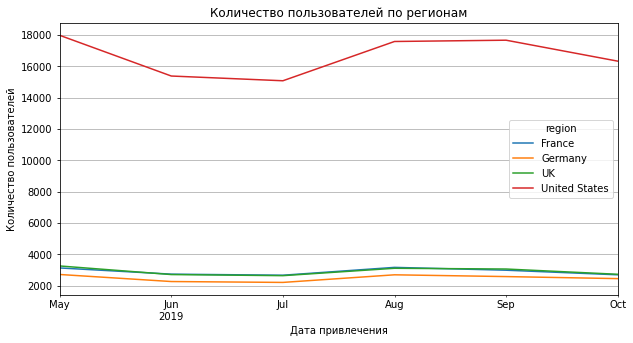

In [34]:
(profiles.pivot_table(index='region', columns='month', values='user_id', aggfunc='nunique')
 .T.plot(grid=True, figsize=(10, 5)))
plt.ylabel('Количество пользователей')
plt.xlabel('Дата привлечения')
plt.title('Количество пользователей по регионам')
plt.show()

<div style="border:solid blue 1px; padding: 20px"> 
В основном пользователи приходят из США (100 тыс. пользователей из 150 тыс.), там же самое большое количество платящих пользователей - 6,9%.

<div style="border:solid blue 1px; padding: 20px"> 
Узнаем, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства.

In [35]:
profiles.groupby('device').agg({'user_id':'nunique', 'payer':'mean'}).sort_values(by=['user_id'], ascending=False)

,user_id,payer
device,,
iPhone,54479,0.062079
Android,35032,0.058518
PC,30455,0.050468
Mac,30042,0.063644


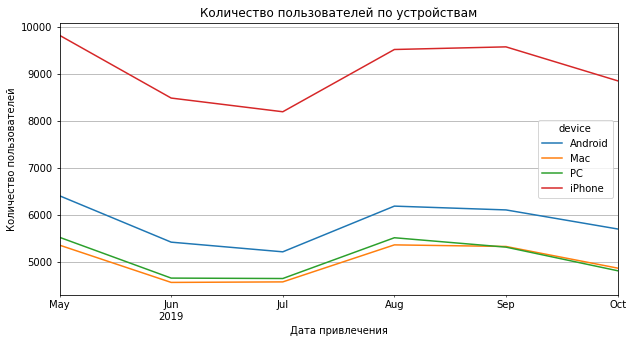

In [36]:
(profiles.pivot_table(index='device', columns='month', values='user_id', aggfunc='nunique')
.T.plot(grid=True, figsize=(10, 5)))
plt.ylabel('Количество пользователей')
plt.xlabel('Дата привлечения')
plt.title('Количество пользователей по устройствам')
plt.show()

<div style="border:solid blue 1px; padding: 20px"> 
54 тыс. клиентов пользуются iPhone, остальные распределены равномерно между остальными площадками (Android - 35 тыс., PC - 30 тыс., Mac - 30 тыс.). Самое большое количество платящих пользователей на Mac и IPhone - 6,3% и 6,2% соответственно.

<div style="border:solid blue 1px; padding: 20px"> 
Изучим рекламные источники привлечения и определим каналы, из которых пришло больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

In [37]:
profiles.groupby('channel').agg({'user_id':'nunique', 'payer':'mean'}).sort_values(by=['user_id'], ascending=False)

,user_id,payer
channel,,
organic,56439,0.020553
FaceBoom,29144,0.122049
TipTop,19561,0.096007
OppleCreativeMedia,8605,0.027077
LeapBob,8553,0.030633
WahooNetBanner,8553,0.052964
RocketSuperAds,4448,0.079137
MediaTornado,4364,0.035747
YRabbit,4312,0.038265


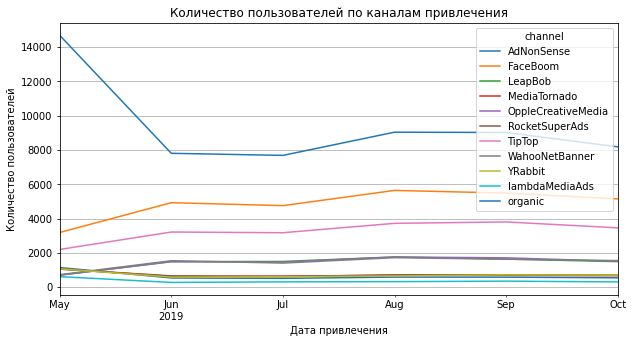

In [38]:
(profiles.pivot_table(index='channel', columns='month', values='user_id', aggfunc='nunique')
 .T.plot(grid=True, figsize=(10, 5)))
plt.ylabel('Количество пользователей')
plt.xlabel('Дата привлечения')
plt.title('Количество пользователей по каналам привлечения')
plt.show()

<div style="border:solid blue 1px; padding: 20px"> 
56 тыс.клиентов пришли благодаря органическому трафику, то есть перешли на сайт из обычных результатов поиска, а не платных рекламных объявлений. Но, как показывает практика, среди них меньше всего доля платящих пользователей - всего 2%. Так же интересно отметить, что их количество уменьшилось почти в 2 раза с июня месяца.

Среди платных объявлений самый популярных источник перехода - FaceBoom, так же среди него больше всего доля платящих пользователей - 12,2%. Меньше всего пользователей перешло с lambdaMediaAds, но зато среди них 10,47% платящих пользователей.

<div style="border:solid blue 1px; padding: 20px"> 
Построим сводную таблицу по регионам и каналам продвижения.

In [39]:
(profiles.pivot_table(index=['region', 'channel'], values='user_id', aggfunc='nunique')
 .sort_values(['region','user_id'], ascending = False))

user_id
region        channel                    
United States organic               38173
              FaceBoom              29144
              TipTop                19561
              RocketSuperAds         4448
              MediaTornado           4364
              YRabbit                4312
UK            organic                6421
              OppleCreativeMedia     3052
              LeapBob                3046
              WahooNetBanner         3003
              AdNonSense             1295
              lambdaMediaAds          758
Germany       organic                5453
              WahooNetBanner         2579
              OppleCreativeMedia     2562
              LeapBob                2519
              AdNonSense             1219
              lambdaMediaAds          649
France        organic                6392
              OppleCreativeMedia     2991
              LeapBob                2988
              WahooNetBanner         2971
              AdNonSense             1366
              lambdaMediaAds          742

#### Вывод
За изучаемый период (с 1 мая по 27 октября 2019 года) Procrastinate Pro+ было привлечено 150 008 клиентов, из которых большая часть из США (100 тыс.). В этом регионе так же самая большая доля платящих клиентов - 6,9%. Самое популярное устройство для входа в приложение - IPhone (54 тыс. пользователей), больше всего платящих пользователей заходят с него либо с Mac. Относительно источника привлечения клиентов, больше всего пришло с органического трафика, но в то же время, среди этих клиентов самая маленькая доля платящих - всего 2%. Самая высокая доля платящих пользователей (12,2%) у FaceBoom - самого популярного источника перехода клиентов среди платных объявлений.
В целом можно сделать вывод, что наблюдается проблема конвертации пользователей: по всем регионам и площадкам крайне низкий уровень пользователей, совершивших хотя бы одну покупку.

### Маркетинг

<div style="border:solid blue 1px; padding: 20px"> 
Посчитаем общую сумму расходов на маркетинг.

In [40]:
costs['costs'].sum()

105497.30000000002

<div style="border:solid blue 1px; padding: 20px"> 
Общая сумма расходов на  маркетинг - 105,5 тыс.

In [41]:
costs.groupby('channel').agg({'costs':'sum'}).sort_values(by=['costs'], ascending=False)

,costs
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


<div style="border:solid blue 1px; padding: 20px"> 
Больше всего вкладываются в рекламу на площадке TipTop, примерно половина от общих расходов - 54,8 тыс. Меньше всего в MediaTornado и YRabbit - около 1 тыс.

<div style="border:solid blue 1px; padding: 20px"> 
Рассмотрим, как затраты на рекламу меняются от месяца к месяцу.

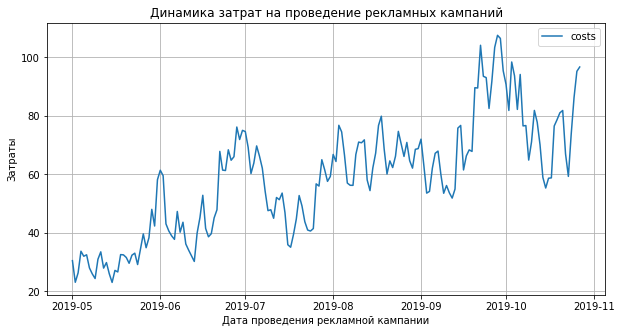

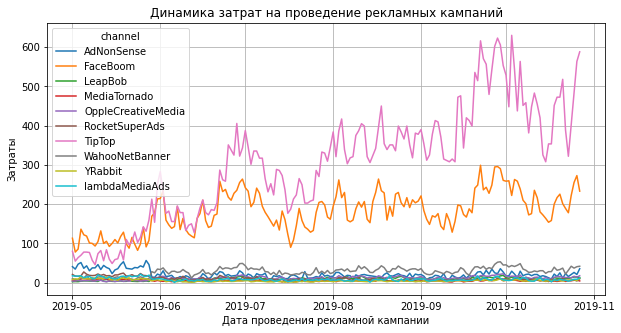

In [42]:
costs.pivot_table(
    index='dt', values='costs', aggfunc='mean'
).plot(grid=True, figsize=(10, 5))
plt.ylabel('Затраты')
plt.xlabel('Дата проведения рекламной кампании')
plt.title('Динамика затрат на проведение рекламных кампаний')
plt.show()

costs.pivot_table(
    index='dt', columns='channel', values='costs', aggfunc='mean'
).plot(grid=True, figsize=(10, 5))
plt.ylabel('Затраты')
plt.xlabel('Дата проведения рекламной кампании')
plt.title('Динамика затрат на проведение рекламных кампаний')
plt.show()

<div style="border:solid blue 1px; padding: 20px"> 
С мая по октябрь средние затраты на рекламу стабильно растут (~в 5 раз). Рост произошел за счет увеличения инвестиций в рекламу на площадках FaceBoom и TipTop.

<div style="border:solid blue 1px; padding: 20px"> 
Рассмотрим, сколько в среднем стоило привлечение одного пользователя из каждого источника. Рассчитаем средний CAC на одного пользователя для всего проекта и для каждого источника трафика.
Для дальнейшего анализа отберем данные только по пользователям, пришедших с платных каналов привлечения.

In [43]:
good_profiles = profiles.query('channel != "organic"')

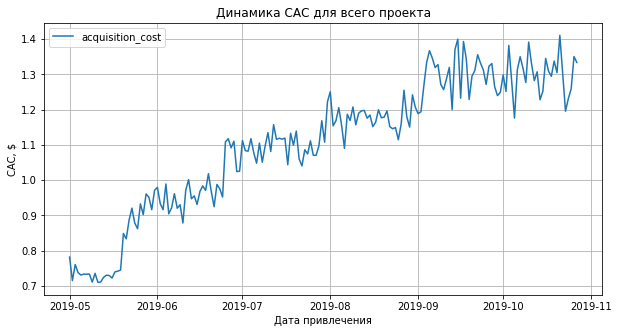

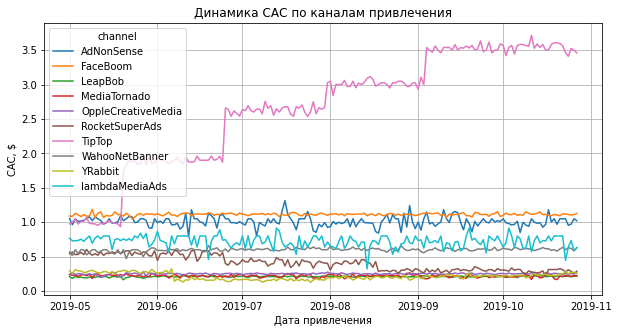

In [44]:
good_profiles.pivot_table(
    index='dt', values='acquisition_cost', aggfunc='mean'
).plot(grid=True, figsize=(10, 5))
plt.ylabel('CAC, $')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС для всего проекта')
plt.show()

good_profiles.pivot_table(
    index='dt', columns='channel', values='acquisition_cost', aggfunc='mean'
).plot(grid=True, figsize=(10, 5))
plt.ylabel('CAC, $')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС по каналам привлечения')
plt.show()

In [45]:
(display(round(good_profiles['acquisition_cost'].mean(),2)))
(display(good_profiles.groupby('channel').agg({'acquisition_cost':'mean'})
         .sort_values(by=['acquisition_cost'], ascending=False)))

1.13

,acquisition_cost
channel,
TipTop,2.799003
FaceBoom,1.113286
AdNonSense,1.008054
lambdaMediaAds,0.724802
WahooNetBanner,0.602245
RocketSuperAds,0.412095
OppleCreativeMedia,0.250000
YRabbit,0.218975
MediaTornado,0.218717


<div style="border:solid blue 1px; padding: 20px"> 
Средний CAC на одного пользователя для всего проекта составил 1.13. С мая по октябрь он вырос в 2 раза: с 0.7 до 1.4.
Такой рост произошел из-за платформы TipTop, с которой пришла большая доля пользователей (~20 тыс., платящие из которых 9%). CAC по ней вырос с 1 до 3.5. В среднем за весь проект CAC для платформы TipTop составил 2.8.

#### Вывод
За изучаемый период (с 1 мая по 27 октября 2019 года) Procrastinate Pro+ было потрачено на рекламу порядка 150 тыс., из которых половина ушла на продвижение на площадке TipTop. Стоимость привлечения пользователей стабильно росла все месяцы за счет данной платформы: CAC по ней вырос с 1 до 3.5, тогда как по другим площадкам он остался неизменным.

### Оценка окупаемости рекламы

<div style="border:solid blue 1px; padding: 20px"> 
Используя графики LTV, ROI и CAC, проанализируем окупаемость рекламы. Будем считать, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения.

<div style="border:solid blue 1px; padding: 20px"> 
Проанализируем общую окупаемость рекламы. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

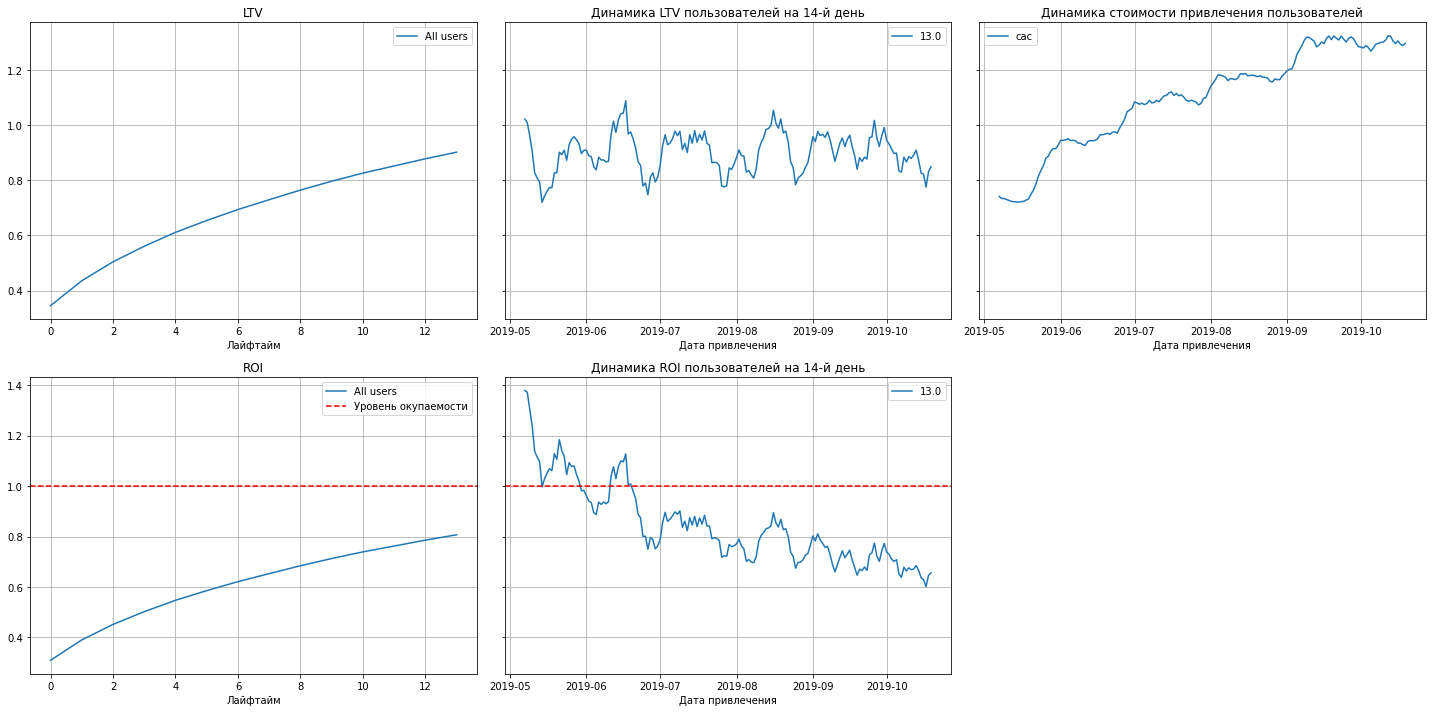

In [46]:
observation_date = datetime(2019, 11, 1).date()
horizon_days = 14

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    good_profiles, orders, observation_date, horizon_days)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

<div style="border:solid blue 1px; padding: 20px"> 
По графикам выше видно, что на момент анализа данных реклама не окупается.
В начале запуска рекламы ROI на 14-й день был выше уровня окупаемости, но постепенно стал снижаться. Это объясняется ростом стоимости привлечения пользователей.

<div style="border:solid blue 1px; padding: 20px"> 
Проанализируем окупаемость рекламы с разбивкой по рекламным каналам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

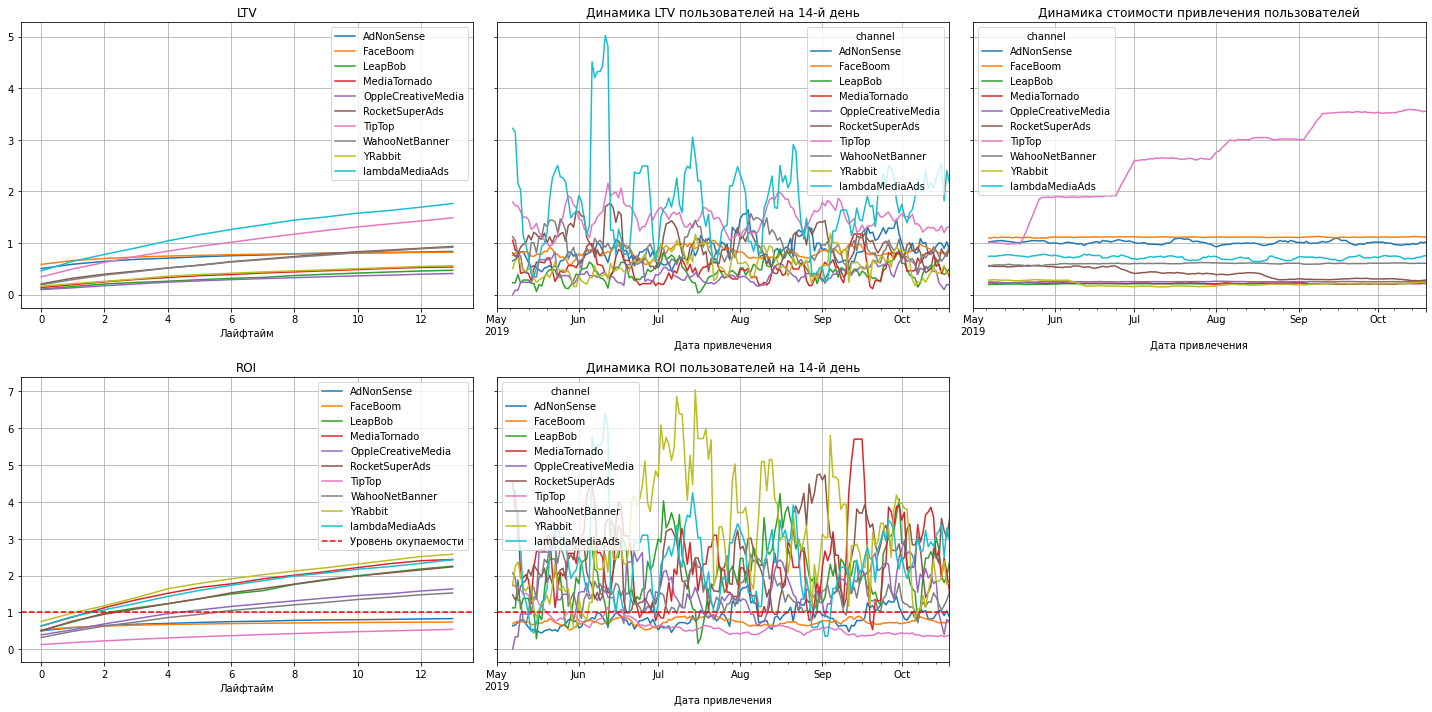

In [47]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    good_profiles, orders, observation_date, horizon_days, dimensions = ['channel'])

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

<div style="border:solid blue 1px; padding: 20px"> 
TipTop, FaceBoom, AdNonSence не выходят на уровень окупаемости к 14 дню.
Отметим, что TipTop занимает второе место по LTV (сумма денег, которую один клиент в среднем приносит
компании со всех своих покупок). Но из-за высокой стоимости привлечения клиентов на данной платформе, инвестиции не окупаются не смотря на большую сумму покупок.
Самая окупаемая площадка YRabbit: у нее невысокий уровень LTV, но в то же время один из самых низких CAC.

<div style="border:solid blue 1px; padding: 20px"> 
Проанализируем окупаемость рекламы с разбивкой по странам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

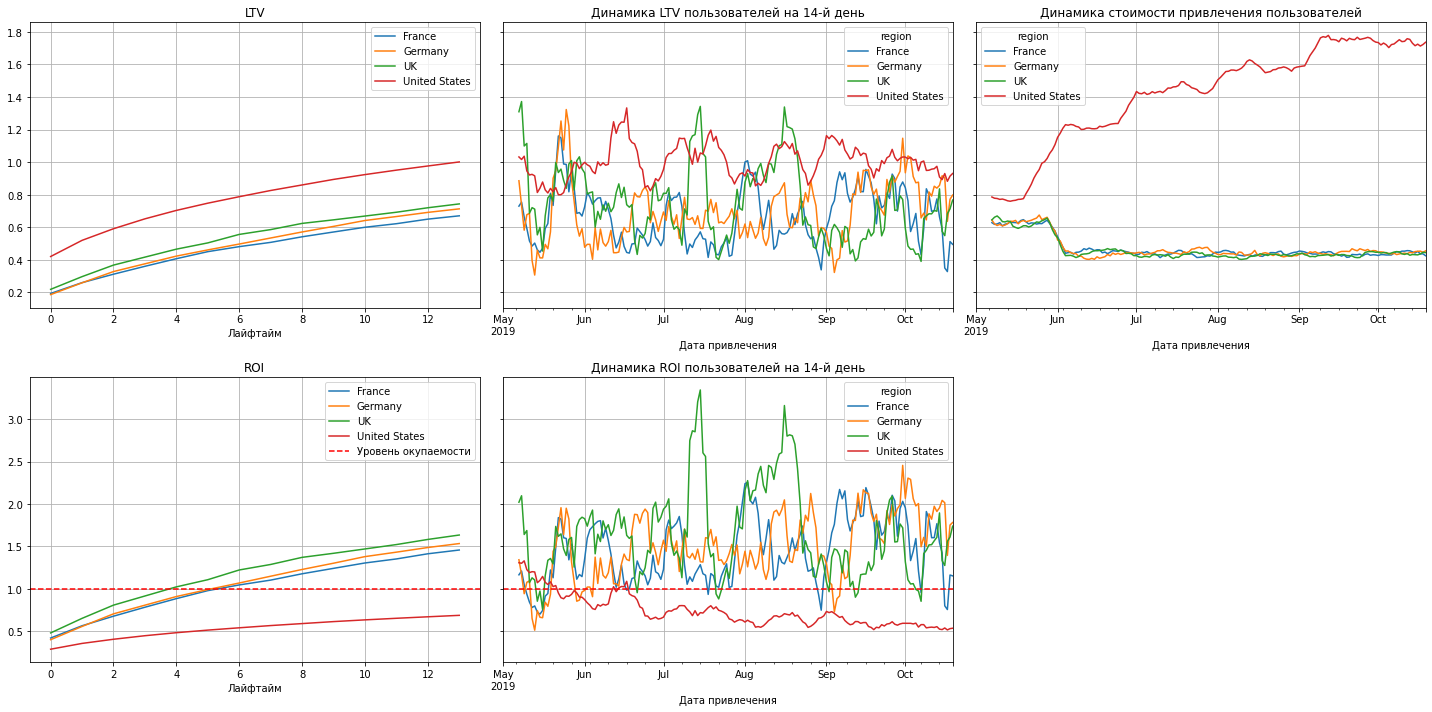

In [48]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    good_profiles, orders, observation_date, horizon_days, dimensions = ['region'])

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

<div style="border:solid blue 1px; padding: 20px"> 
Самый высокий уровень LTV в США, но там же с середины мая наблюдается резкий рост CAC. Поэтому с этого момента ROI не выходит на уровень окупаемости.
Самый окупаемый регион - Англия.

<div style="border:solid blue 1px; padding: 20px"> 
Проанализируем окупаемость рекламы с разбивкой по устройствам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

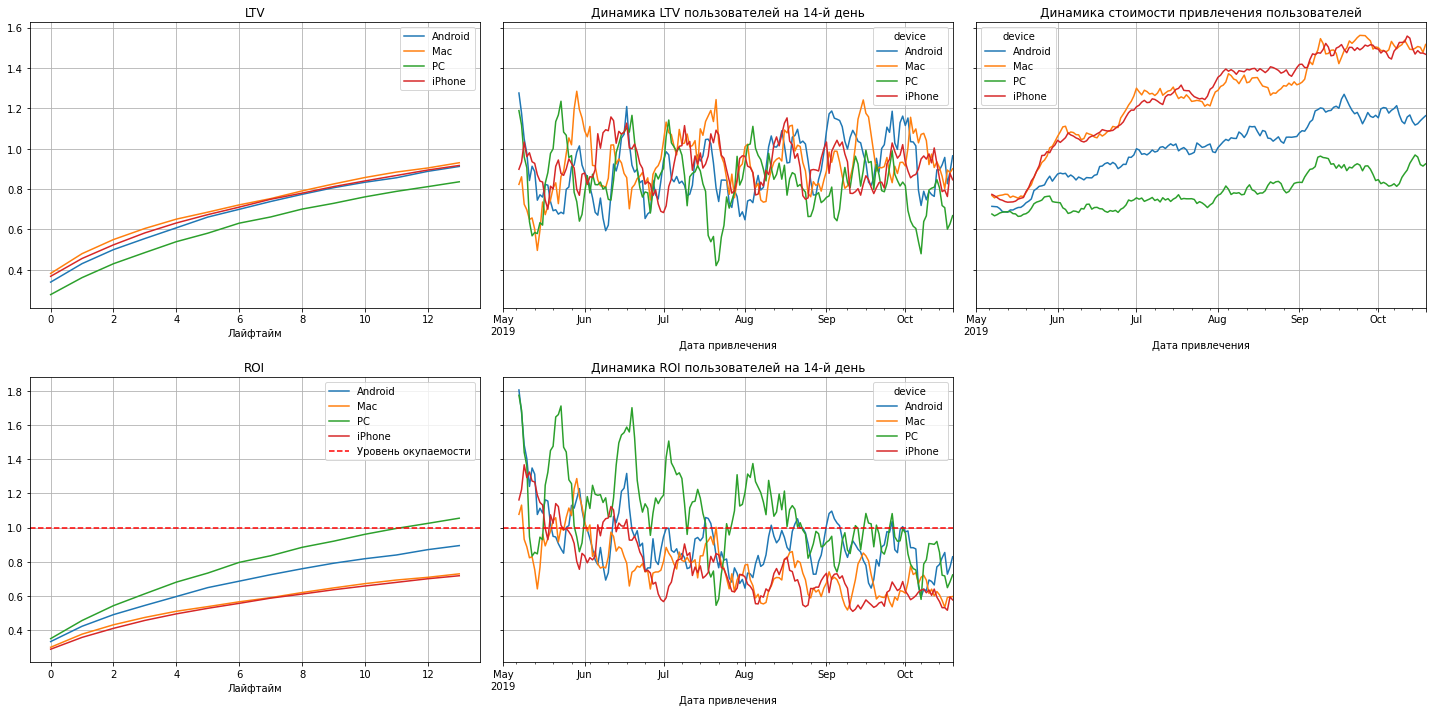

In [49]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    good_profiles, orders, observation_date, horizon_days, dimensions = ['device'])

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

<div style="border:solid blue 1px; padding: 20px"> 
Самый низкий уровень LTV у PC, но только по этому устройству реклама окупается.
Но если посмотреть на график динамики ROI на 14-й день, мы увидим, что к концу рассматриваемого периода и по данному устройству ROI перестает выходить на уровень окупаемости.
Причина - стабильный уровень LTV и рост CAC по всем каналам, в особенности iPhone и Mac.

<div style="border:solid blue 1px; padding: 20px"> 
Проанализируем дополнительно окупаемость рекламы с разбивкой по каналам привлечения отдельно по США и Европе. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

In [50]:
US_profiles = good_profiles.query('region == "United States"')
EU_profiles = good_profiles.query('region != "United States"')

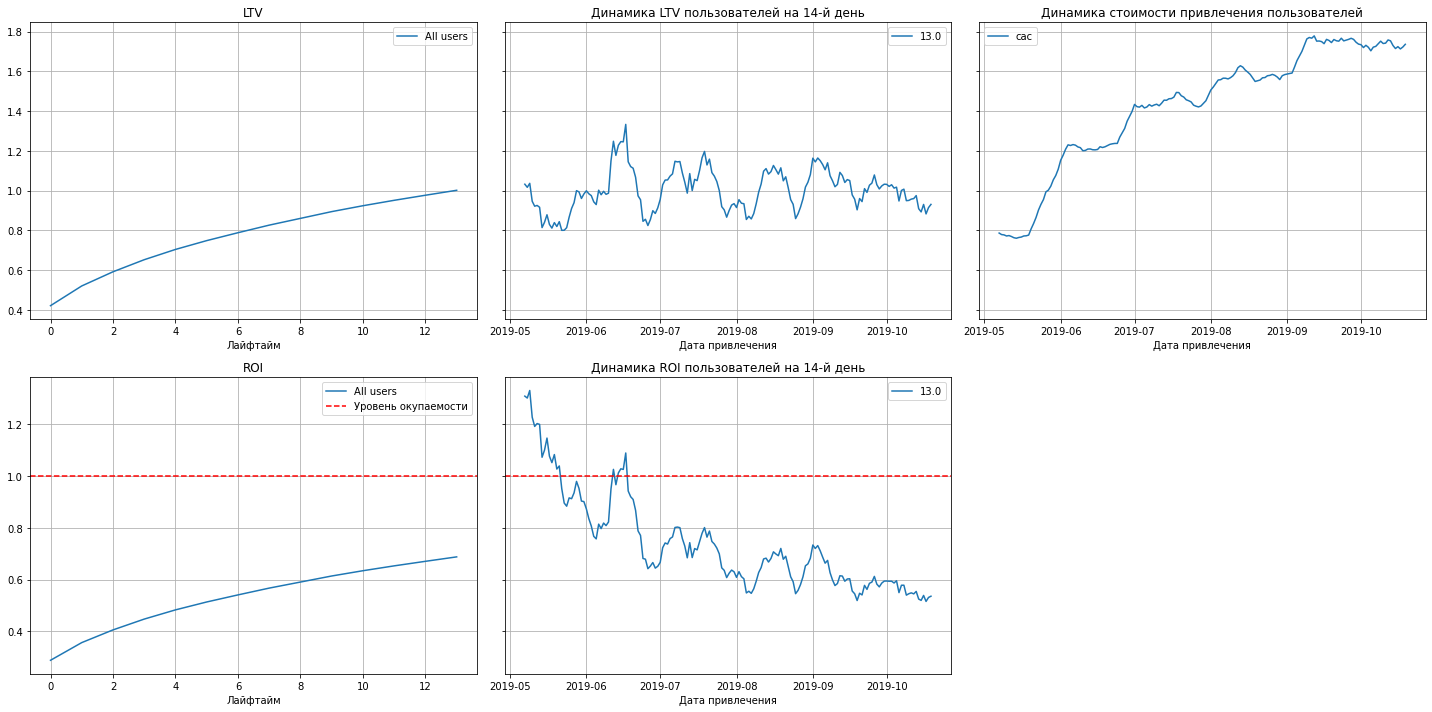

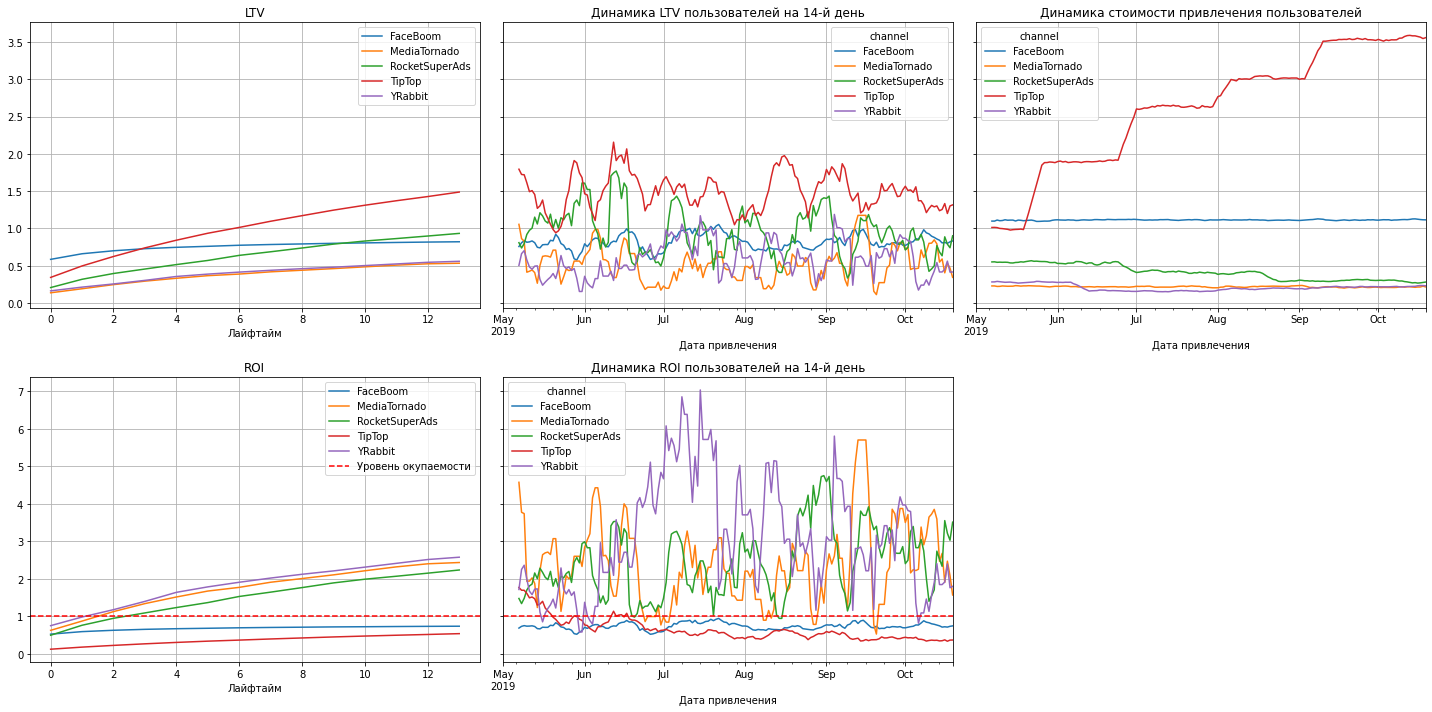

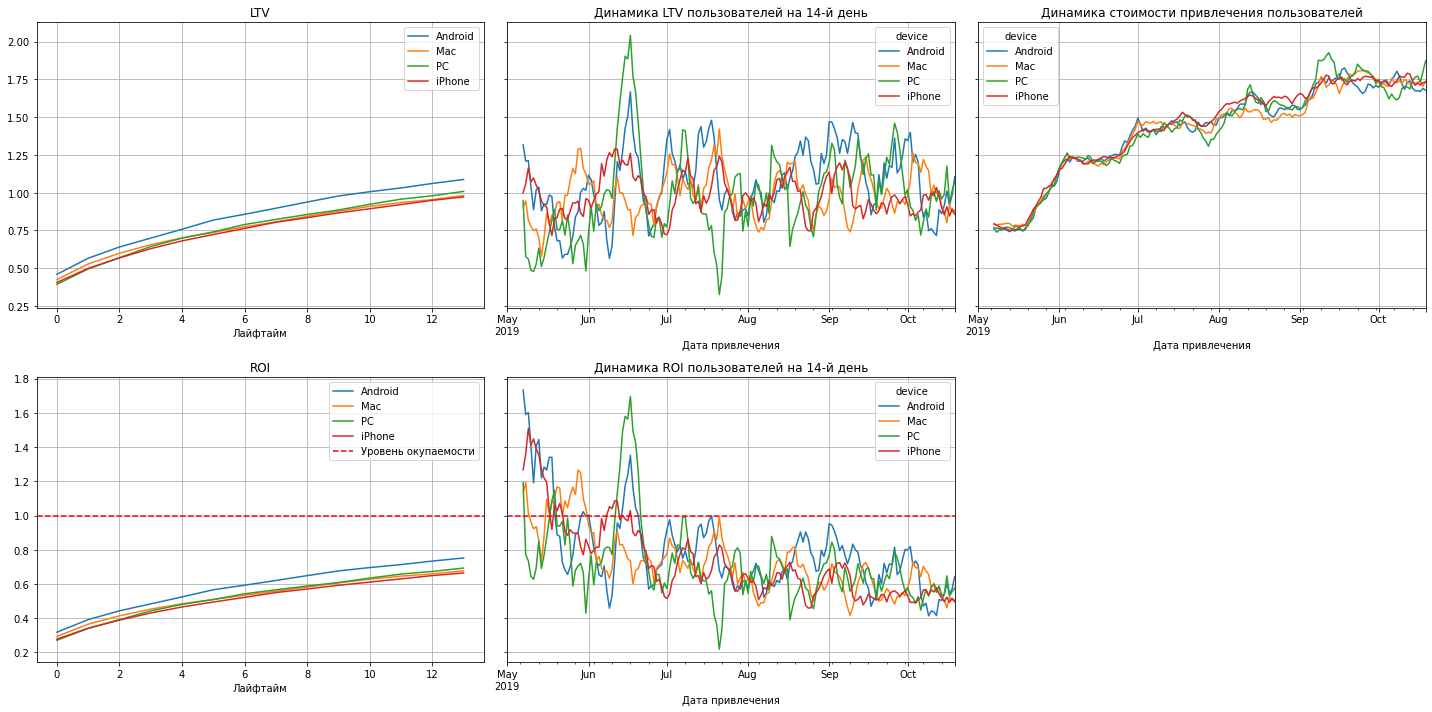

In [51]:
#окупаемость рекламы в США
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    US_profiles, orders, observation_date, horizon_days)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

#окупаемость рекламы в США в разбивке по каналам
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    US_profiles, orders, observation_date, horizon_days, dimensions = ['channel'])

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

#окупаемость рекламы в США в разбивке по устройствам
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    US_profiles, orders, observation_date, horizon_days, dimensions = ['device'])

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

<div style="border:solid blue 1px; padding: 20px"> 
В США реклама не окупается.
Реклама не окупается ни по одному устройству: стоимость привлечения пользователей по всем устойствам выросла более чем в 2 раза.
Относительно каналов привлечения, как и говорилось выше, не окупаемыми каналами являются FaceBoom и TipTop.
Окупаемые каналы - YRabbit, MediaTornado и RocketSuperAds.

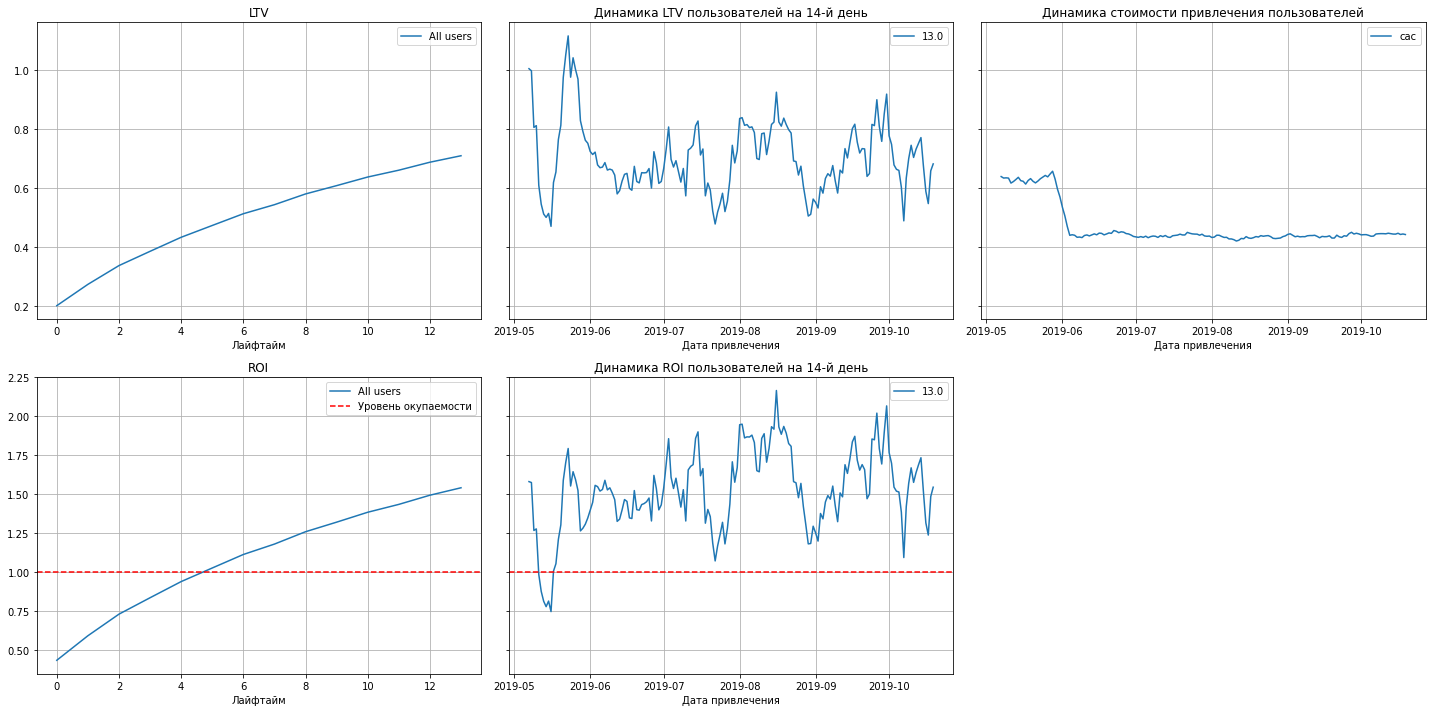

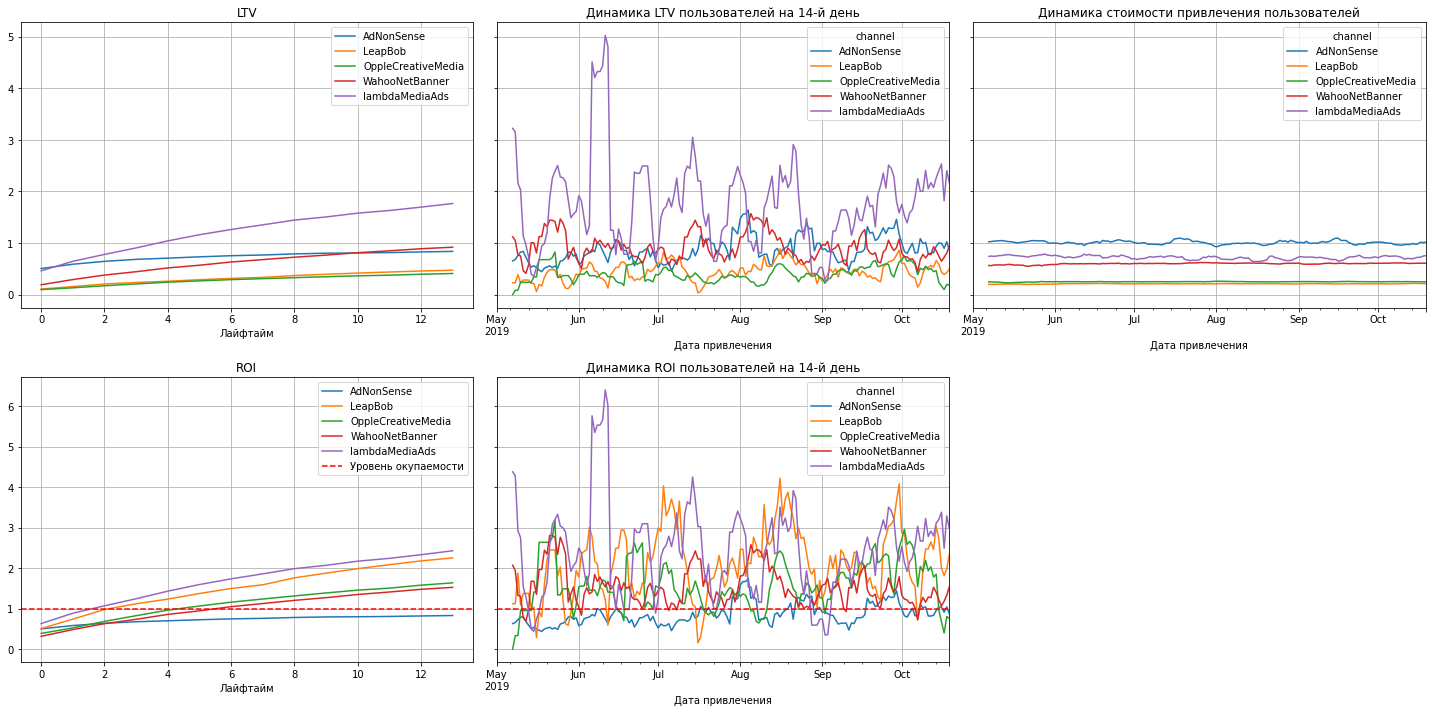

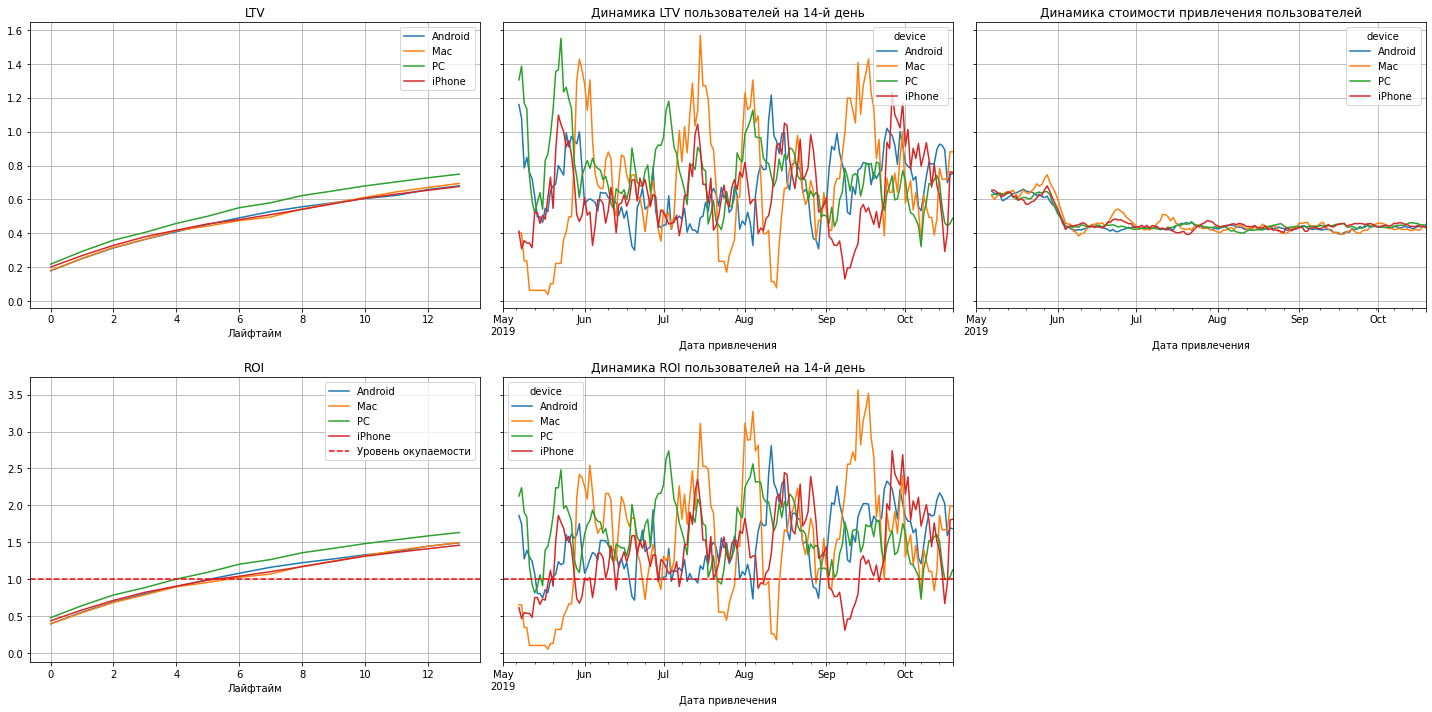

In [52]:
#окупаемость рекламы в Европе
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    EU_profiles, orders, observation_date, horizon_days)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

#окупаемость рекламы в Европе в разбивке по каналам
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    EU_profiles, orders, observation_date, horizon_days, dimensions = ['channel'])

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

#окупаемость рекламы в Европе в разбивке по устройствам
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    EU_profiles, orders, observation_date, horizon_days, dimensions = ['device'])

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

<div style="border:solid blue 1px; padding: 20px"> 
В Европе реклама окупается.
Она окупается по всем устройствам: стоимость привлечения пользователей по всем устойствам снизилась в июне на 0.2.
Относительно каналов привлечения, окупаются все каналы кроме AnNonSense.

<div style="border:solid blue 1px; padding: 20px"> 
Промежуточные выводы:
    
- реклама не окупается в США и окупается в Европе;
- окупаемые каналы в США - YRabbit, MediaTornado и RocketSuperAds;
- окупаемые каналы в Европе - lambdaMediaAds, LeapBob, OppleCreativeMedia, WahooNetBanner;
- в разбивке по устройствам реклама окупается на всех устройствах в Европе и ни на одном устройстве в США;

По проекту в целом:

- уровень LTV стабильный;
- уровень CAC значительно вырос за счет рекламы на площадке TipTop (регион США);
- это обусловило падение ROI;

<div style="border:solid blue 1px; padding: 20px"> 
Построим и изучим графики конверсии и удержания с разбивкой по устройствам, странам, рекламным каналам.

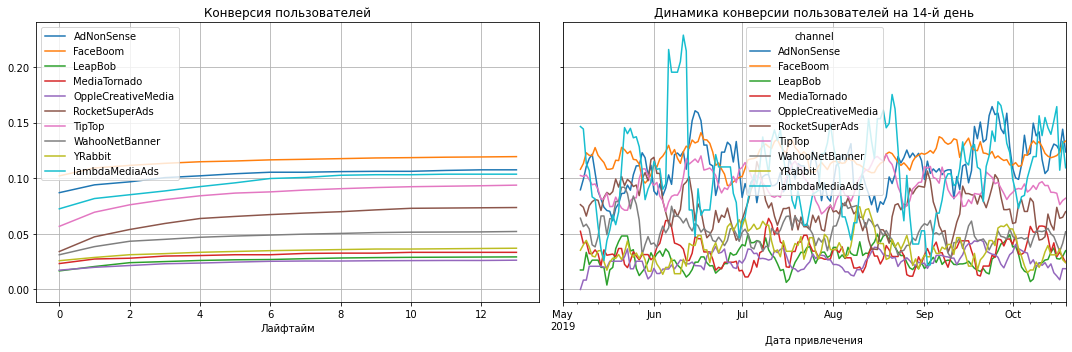

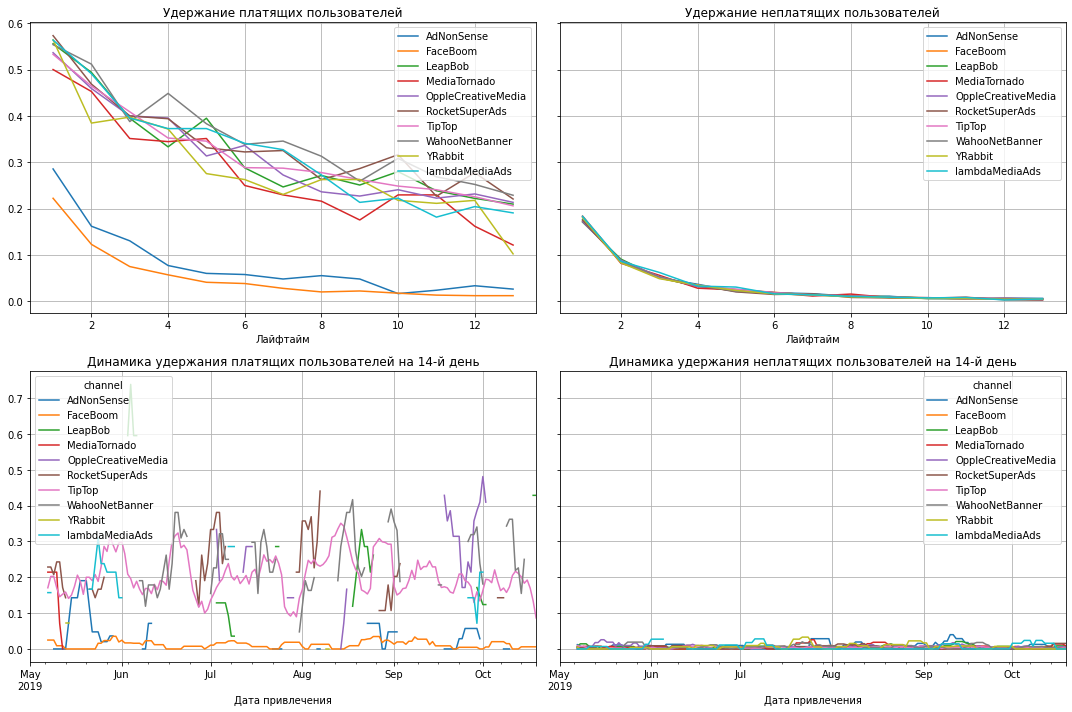

In [53]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    good_profiles, orders, observation_date, horizon_days, dimensions=['channel'])

plot_conversion(conversion_grouped, conversion_history, horizon_days)

retention_raw, retention_grouped, retention_history = get_retention(
    good_profiles, visits, observation_date, horizon_days, dimensions=['channel'])

plot_retention(retention_grouped, retention_history, horizon_days) 

<div style="border:solid blue 1px; padding: 20px"> 
По графикам конверсии и удержания с разбивкой по рекламным каналам виден низкий уровень конвертации пользователей, а также снижается удержание, как платящих пользователей, так и не платящих.
Хуже всего удерживаются пользователи, пришедшие с площадок AdNonSense и FaceBoom.

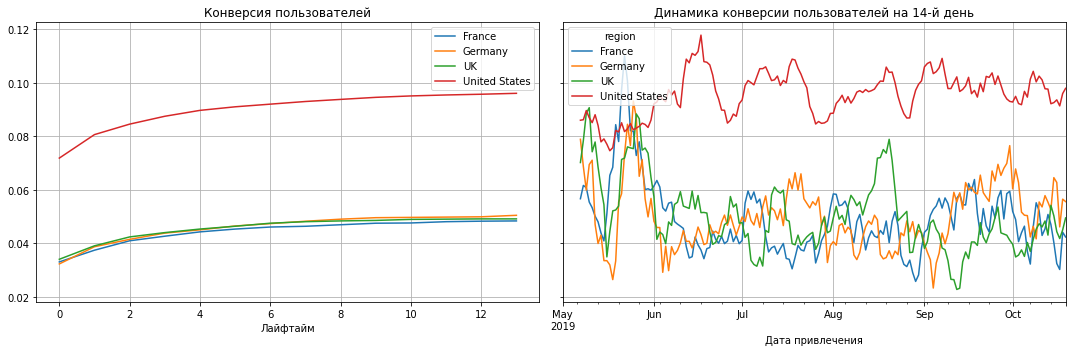

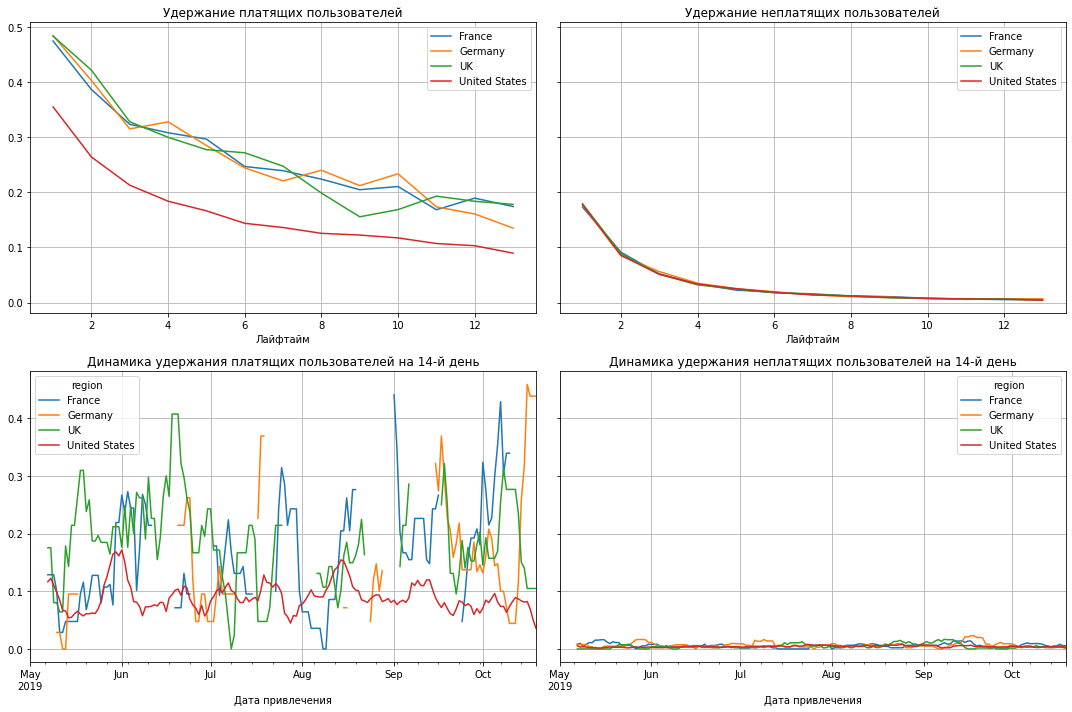

In [54]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    good_profiles, orders, observation_date, horizon_days, dimensions=['region'])

plot_conversion(conversion_grouped, conversion_history, horizon_days)

retention_raw, retention_grouped, retention_history = get_retention(
    good_profiles, visits, observation_date, horizon_days, dimensions=['region'])

plot_retention(retention_grouped, retention_history, horizon_days) 

<div style="border:solid blue 1px; padding: 20px"> 
Тот же вывод можно сделать по графикам в разбивке по регионам.
Стоит отметить, что лучше всего конвертируются пользователи из США, но по ним так же самый низкий уровень удержания.

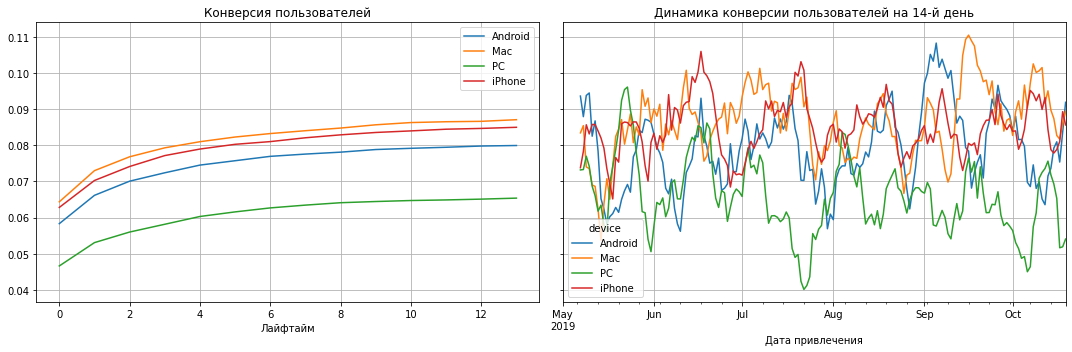

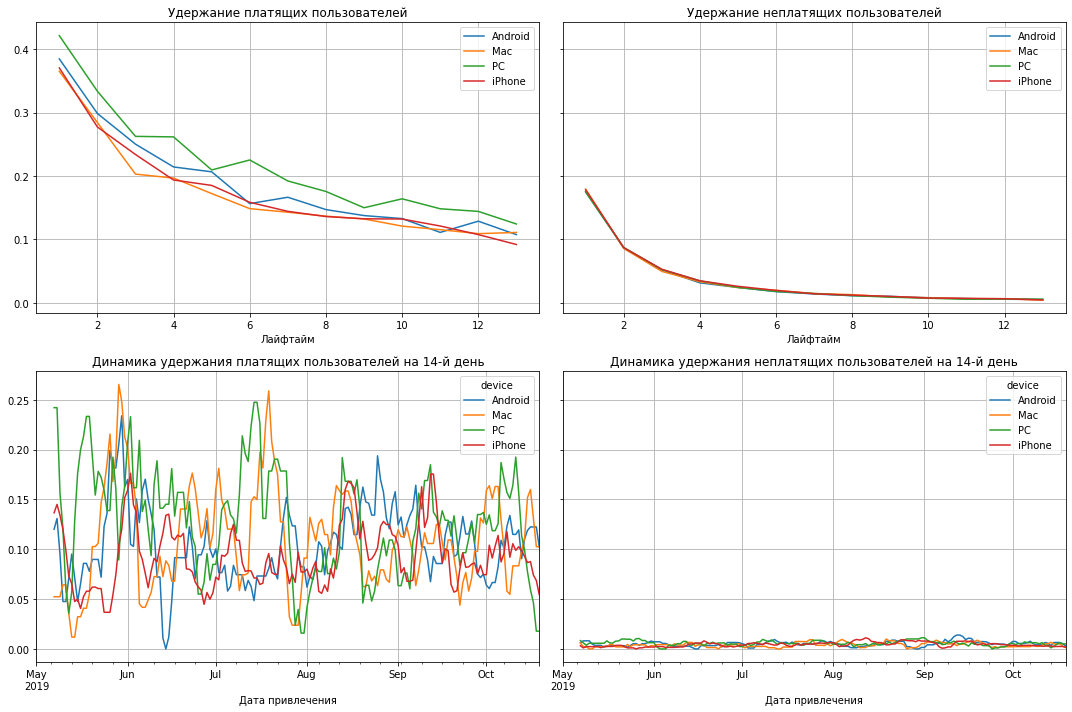

In [55]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    good_profiles, orders, observation_date, horizon_days, dimensions=['device'])

plot_conversion(conversion_grouped, conversion_history, horizon_days)

retention_raw, retention_grouped, retention_history = get_retention(
    good_profiles, visits, observation_date, horizon_days, dimensions=['device'])

plot_retention(retention_grouped, retention_history, horizon_days) 

<div style="border:solid blue 1px; padding: 20px"> 
Та же картина наблюдается в разбивке по устройствам. Лучше всего конвертируются пользователи с Mac, хуже всего с PC, но по нему повыше удержание, чем по остальным устройствам.

#### Вывод
По полученным результатам анализа можно сделать вывод, что реклама не окупается в целом по проекту.
Причинами не окупаемости рекламы является:
- низкий уровень конвертации пользователей;
- значительное снижение уровня удержания платящих пользователей по всем площадкам, регионам и устройствам;
- не окупаемость рекламы в США, что объяснется резким ростом стоимости привлечения клиентов;
- не окупаемость рекламы на площадках TipTop, FaceBoom, AdNonSence:
-- резкий рост вложений в площадку TipTop (половина рекламного бюджета ушла на продвижение на данной площадке). Эта инвестиция не окупилась за рассматриваемый период: не произошло значительного роста конвертации пользователей, удержание платящих пользователей продолжило стремительное падение;
-- сильное падение удержания платящих пользователей на площадке FaceBoom и AdNonSence.

Из позитивных моментов - реклама окупается в Европе, откуда пришла треть пользоваталей приложения (по всем устройствам и почти на всех платформах).
Росту ROI способствовала невысокая стоимость привлечения клиентов (с июня, с момента роста инвестиций в площадки TipTop и FaceBoom в США, CAC снизился в 1,5 раза).

### Вывод

США - основной регион развлекательного приложения Procrastinate Pro+. Именно оттуда пришло 100 тыс. пользователей. Желание компании активнее развиваться в данном регионе логично и объяснимо.

С июня месяца было принято решение увеличить рекламный бюджет для привлечения новых клиентов в США. Но не смотря на активные денежные вливания в рекламу, роста привлечения новых пользователей не наблюдалось. 
Для продвижения были выбраны 2 площадки: FaceBoom и TipTop, в которые был вложен почти весь рекламный бюджет. FaceBoom показал себя неплохо: 29 тыс. клиентов при затратах на рекламу в 32 тыс. Стоимость привлечения клиентов осталась неизменной на протяжении всего рассматриваемого периода, но инвестиции не окупились. Компания столкнулась с проблемой активного оттока платящих пользователей.
С TipTop другая ситуация. Удержание платящих пользователей находится на уровне со всеми остальными площадками, но CAC с июня вырос в 3 раза: ROI не достиг уровня окупаемости. С TipTop пришло 19,5 тыс. пользователей при рекламном бюджета в 54,7 тыс.

Данные действия привели к тому, что реклама в регионе США не окупилась. Для оптимизации деятельности в данном регионе можно предложить следующие рекомендации:

- уменьшить инвестиции в рекламу на платформах FaceBoom и TipTop;
- увеличить инвестиции в окупаемые платформы - YRabbit, MediaTornado и RocketSuperAds;
- перенаправить часть освободившихся средств в улучшение сервиса и проработку решений по увеличению конвертации пользователей и их дальнейшее удержание.

Второй регион - Европа (на данный момент в него входит Англия, Франция и Германия, в каждой стране примерно равное количество пользователей). Из данного региона пришла треть пользователей, около 50 тыс.

В отличие от США реклама в данном регионе окупается. Это видно по всем устройствам и почти по всем рекламным площадкам (кроме AdNonSence).
Для оптимизации деятельности в данном регионе можно предложить следующие рекомендации:

- рассмотреть возможность расширения на европейском рынке (изучить конкурентов, риски). В случае положительного решения рассмотреть возможность пересмотра распределения рекламного бюджета в разбивке по регионам (на данный момент почти весь бюджет уходит в США);
- уменьшить инвестиции в рекламу на платформе AdNonSence;
- увеличить инвестиции на окупаемых платформах - lambdaMediaAds и LeapBob, OppleCreativeMedia и WahooNetBanner;
- увеличить инвестиции в улучшение сервиса и проработку решений по увеличению конвертации пользователей и их дальнейшее удержание. Не смотря на окупаемость рекламы уровень конвертации пользователей и их дальнейшее удержание находятся на низком уровне.